Vamos analisar o c√≥digo passo a passo. Este c√≥digo executa a decomposi√ß√£o em valores singulares (SVD) de uma matriz e aplica isso a uma imagem PNG para aproximar a imagem utilizando uma redu√ß√£o de dimensionalidade.

### 1. Importando Bibliotecas e Inicializando Dados

In [2]:
import numpy as np

X = np.array([[1, 2], [3, 4], [5, 6]])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

- Importa√ß√£o de bibliotecas: Aqui, apenas a biblioteca NumPy √© importada.
- Defini√ß√£o da matriz: Uma matriz ùëã de dimens√£o 3√ó2 √© criada com valores inteiros.

### 2. Decomposi√ß√£o SVD

In [3]:
U, S, Vt = np.linalg.svd(X)

In [4]:
U, S, Vt

(array([[-0.2298477 ,  0.88346102,  0.40824829],
        [-0.52474482,  0.24078249, -0.81649658],
        [-0.81964194, -0.40189603,  0.40824829]]),
 array([9.52551809, 0.51430058]),
 array([[-0.61962948, -0.78489445],
        [-0.78489445,  0.61962948]]))

- C√°lculo da SVD: A fun√ß√£o np.linalg.svd(X) realiza a decomposi√ß√£o em valores singulares, retornando tr√™s matrizes:
- U: Matriz das left singular vectors (vectores singulares √† esquerda).
- S: Vetor dos valores singulares (n√£o uma matriz).
- Vt: Matriz das right singular vectors transposta (vectores singulares √† direita).
- O resultado U, S, e Vt s√£o exibidos.

### 3. Verifica√ß√£o da Ortogonalidade de U e Vt

In [5]:
(U.T @ U).round(2)

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [ 0., -0.,  1.]])

In [6]:
(Vt @ Vt.T).round(2)

array([[1., 0.],
       [0., 1.]])

- Verifica√ß√£o de Ortogonalidade:
- U.T @ U deve resultar na matriz identidade, indicando que os vetores em 
ùëà s√£o ortogonais entre si.
- Vt @ Vt.T tamb√©m deve resultar na matriz identidade, indicando a ortogonalidade dos vetores em ùëâùë°.

### 4. Cria√ß√£o da Matriz Diagonal Completa de S

In [7]:
S_full = np.vstack([np.diag(S), np.zeros((1, 2))])
S_full

array([[9.52551809, 0.        ],
       [0.        , 0.51430058],
       [0.        , 0.        ]])

Constru√ß√£o da Matriz Diagonal:
- np.diag(S) cria uma matriz diagonal a partir do vetor ùëÜ.
- np.zeros((1, 2)) adiciona uma linha de zeros √† matriz diagonal para completar a dimens√£o 3√ó2.
- S_full agora √© uma matriz 3√ó2 que cont√©m os valores singulares na diagonal.

### 5. Recombina√ß√£o

In [8]:
U, S_full, Vt

(array([[-0.2298477 ,  0.88346102,  0.40824829],
        [-0.52474482,  0.24078249, -0.81649658],
        [-0.81964194, -0.40189603,  0.40824829]]),
 array([[9.52551809, 0.        ],
        [0.        , 0.51430058],
        [0.        , 0.        ]]),
 array([[-0.61962948, -0.78489445],
        [-0.78489445,  0.61962948]]))

In [9]:
U @ S_full @ Vt

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

In [11]:
U[:,:2] @ np.diag(S) @ Vt

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

In [10]:
X

array([[1, 2],
       [3, 4],
       [5, 6]])

Recombina√ß√£o:
- A matriz original ùëã √© recuperada a partir da decomposi√ß√£o utilizando a multiplica√ß√£o das matrizes ùëà, ùëÜfull, e ùëâùë°.

### 6. Leitura e Convers√£o de Imagem

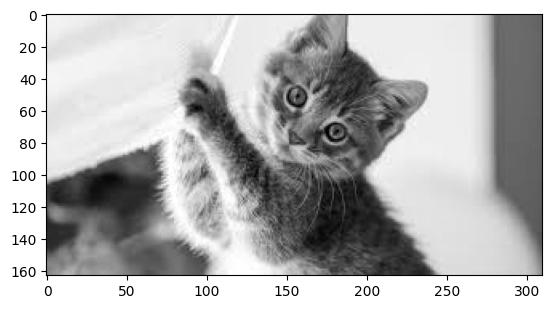

In [12]:
# Leia uma imagem png e converta para escala de cinza
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('image.png')
X = img.mean(axis=2)
plt.imshow(X, cmap='gray')


- Importa√ß√£o de bibliotecas: matplotlib √© importado para visualiza√ß√£o.
- Leitura da Imagem: A imagem image.png √© lida e armazenada em img.
- Convers√£o para Escala de Cinza: A m√©dia ao longo do eixo 2 (cor) √© calculada, resultando em uma imagem em escala de cinza ùëã.
- Exibi√ß√£o da Imagem: A imagem √© exibida em escala de cinza.

### 7. Decomposi√ß√£o SVD na Imagem

In [13]:
X.shape

(163, 310)

In [14]:
U, S, Vt = np.linalg.svd(X)

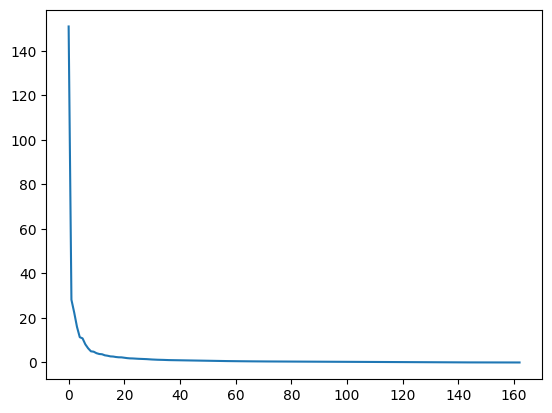

In [15]:
plt.plot(S)

- Dimens√µes da Imagem: A forma da matriz ùëã (dimens√µes da imagem) √© exibida.
- C√°lculo da SVD: A SVD √© calculada novamente, mas agora na matriz da imagem.
- Plotagem dos Valores Singulares: Um gr√°fico dos valores singulares √© gerado, permitindo visualizar a import√¢ncia relativa de cada valor singular.

### 8. Aproxima√ß√£o da Imagem

In [28]:
detail_level = 30

U_aprox = U[:, :detail_level]
S_aprox = S[:detail_level]
Vt_aprox = Vt[:detail_level, :]

- Defini√ß√£o do N√≠vel de Detalhe: O n√∫mero de valores singulares a serem usados para a aproxima√ß√£o √© definido como 30.
- Cria√ß√£o das Matrizes Aproximadas:
- U_aprox: Seleciona as primeiras 30 colunas da matriz ùëà.
- S_aprox: Seleciona os primeiros 30 valores singulares do vetor ùëÜ.
- Vt_aprox: Seleciona as primeiras 30 linhas da matriz ùëâùë°.

In [29]:
U_aprox.shape, S_aprox.shape, Vt_aprox.shape

((163, 30), (30,), (30, 310))

### 9. Reconstru√ß√£o da Imagem Aproximada

In [30]:
X_aprox = U_aprox @ np.diag(S_aprox) @ Vt_aprox

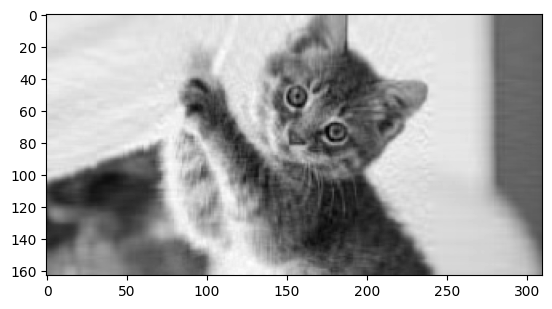

In [31]:
plt.imshow(X_aprox, cmap='gray')

- Reconstru√ß√£o: A imagem aproximada ùëãaprox √© obtida multiplicando as matrizes reduzidas ùëàaprox, ùëÜaprox, e ùëâùë°aprox.
- Exibi√ß√£o da Imagem Aproximada: A imagem resultante da aproxima√ß√£o √© exibida.

### 10. Resumo

- O c√≥digo realiza a decomposi√ß√£o em valores singulares (SVD) de uma matriz 
ùëã e aplica isso a uma imagem PNG, reduzindo sua dimensionalidade para criar uma aproxima√ß√£o.
- O uso de SVD permite extrair caracter√≠sticas relevantes e simplificar a imagem, mantendo a maior parte de suas informa√ß√µes, representando um exemplo pr√°tico de compress√£o de imagem.

### 11. Conclus√£o

A decomposi√ß√£o em valores singulares √© uma t√©cnica poderosa, n√£o apenas para a compress√£o de imagens, mas tamb√©m para an√°lise de dados em geral, ajudando a identificar padr√µes subjacentes em conjuntos de dados complexos.